In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

# Load Data

In [13]:
data = pd.read_parquet('data/training_data.parquet')

In [14]:
# reorder columns
features = pd.read_csv('data/ordered_feature_dictionary.csv')
feature_names = features['Feature Name'].values
data = data[feature_names]

In [15]:
data.head()

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_14,customer_spend_15,customer_spend_16,customer_spend_17,customer_spend_18,customer_spend_19,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_04,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_18,customer_digital_activity_19,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_merchant_01,customer_merchant_02,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
0,168972,152285,0,0,5466.06,1700.00,58.434969,86.0,107.215862,14.0,133.0,4477.0,29719.09,782.0,306.0,3.0,4.0,NaN,1.0,NaN,0.714531,20.85,0.000000,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.444444,0.017921,0.000468,26.686594,74.0,3682.75,138.0,111.0,NaN,NaN,0.905510,0.307692,1.219756,13.0,4.000000,15.856826,101.0,0.157534,65923.0,29.781042,43.0,0.0,0.0,0.0,32.0,1429.49,48.0,49466.0,29.180,NaN
1,212404,39032,0,0,781.56,597.41,5.392089,125.0,35.552000,2.0,8.0,17577.0,1051.40,52.0,43.0,1.0,2.0,NaN,1.0,NaN,0.871597,24.81,0.419355,7.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.928261,3.0,1171.35,23.0,17.0,NaN,NaN,0.961583,3.808333,6.998555,1.0,3.808333,6.998555,403.0,0.084416,7801.0,34.643313,97.0,0.0,0.0,0.0,15.0,5646.86,163.0,3638.0,28.465,NaN
2,225178,7439,0,0,1457.84,1200.00,33.780445,180.0,31.623103,11.0,62.0,49494.0,4695.22,196.0,136.0,1.0,24.0,2.0,2.0,3.0,0.076536,32.26,0.836364,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,48.837872,19.0,2295.38,47.0,42.0,NaN,NaN,0.327672,NaN,0.129853,13.5,NaN,1.753009,406.0,0.240000,12868.0,1731.000000,2.0,1731.0,2.0,2.0,8.0,3462.00,2.0,3912.0,421.500,NaN
3,183948,485069,0,0,351.22,500.00,37.340085,134.0,112.277391,16.0,33.0,NaN,5190.94,167.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952381,28.666667,0.0,NaN,1.0,4.0,NaN,NaN,NaN,20.0,19.0,19.0,13.0,19.0,7.0,3.0,0.0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769936,NaN,NaN,NaN,2.000000,9.000063,326.0,0.187500,23553.0,54.800000,4.0,0.0,0.0,0.0,62.0,274.00,5.0,28919.0,50.000,NaN
4,210107,536004,1,0,831.67,99.00,77.794164,114.0,448.427273,5.0,8.0,NaN,11713.96,33.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754386,15.000000,0.0,NaN,1.0,2.0,NaN,NaN,NaN,15.0,15.0,15.0,7.0,15.0,4.0,3.0,10.0,NaN,1.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,1.767939,326.0,0.428571,308.0,166.000000,1.0,0.0,0.0,0.0,74.0,166.00,1.0,1086.0,69.509,NaN


# Drop Features
Features with more than 50% NAs will be dropped

Total 32 features dropped, hence 35 features remaining (excluding the 4 columns for customer/merchant ID, recommendation & activation)

In [16]:
to_drop = data.columns[data.isna().sum() >= (len(data.index) * 0.5)]
print(len(to_drop))

32


In [17]:
data = data.drop(to_drop, axis=1)

nan_counts = data.isna().sum()

with pd.option_context('display.max_rows', None):
    print(nan_counts)

customer                              0
merchant                              0
ind_recommended                       0
activation                            0
customer_profile_01                1695
customer_profile_02                1695
customer_profile_03               80754
customer_profile_04                4111
customer_spend_01               2047765
customer_spend_02               2047765
customer_spend_03                942701
customer_spend_05                942701
customer_spend_06                610900
customer_spend_07                610900
customer_digital_activity_01     588716
customer_digital_activity_02      32878
customer_digital_activity_21    4315004
customer_digital_activity_22    4124232
customer_industry_spend_01      5854184
customer_industry_spend_02      5854184
customer_industry_spend_03      5854184
customer_industry_spend_04      5854184
customer_industry_spend_05      5854184
customer_merchant_03            3861485
distance_04                     2204000


In [18]:
nan_counts.to_csv('data/nan_counts.csv', index=True)

# Drop Rows
Look for rows with high proportion of NAs --> threshold set to 50% for now also (50% of the 35 features remaining)

<AxesSubplot:ylabel='Count'>

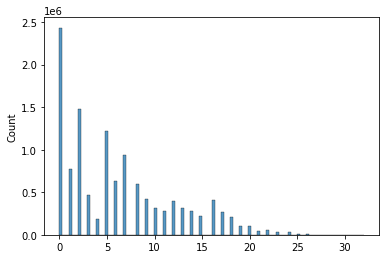

In [20]:
row_nan_count = data.isna().sum(axis=1)

sns.histplot(row_nan_count, bins=100)

In [22]:
rows_to_drop = data.index[data.isna().sum(axis=1) >= (35 * 0.5)]
print(len(rows_to_drop))

590639


In [23]:
data = data.drop(rows_to_drop, axis=0)

nan_counts = data.isna().sum()

with pd.option_context('display.max_rows', None):
    print(nan_counts)

customer                              0
merchant                              0
ind_recommended                       0
activation                            0
customer_profile_01                 804
customer_profile_02                 804
customer_profile_03               69353
customer_profile_04                3012
customer_spend_01               1736594
customer_spend_02               1736594
customer_spend_03                754959
customer_spend_05                754959
customer_spend_06                479736
customer_spend_07                479736
customer_digital_activity_01     547928
customer_digital_activity_02      26430
customer_digital_activity_21    3936522
customer_digital_activity_22    3759033
customer_industry_spend_01      5264156
customer_industry_spend_02      5264156
customer_industry_spend_03      5264156
customer_industry_spend_04      5264156
customer_industry_spend_05      5264156
customer_merchant_03            3367917
distance_04                     1834464


In [24]:
nan_counts.to_csv('data/nan_counts_2.csv', index=True)